<h1>Image Datasets</h1>

<h2>Index</h2>
<ul>    
    <li><a href="#Dataframes"> Dataframes</a></li>
    <li><a href="#Dataset"> Datasets</a></li>
    <li><a href="#Torchvision">Torchvision Transforms</a></li>
</ul>
<br>
<br>
Dataset origin: https://skills.network/lab-tools

<h2>Preparation</h2>

In [ ]:
import os

import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

import torchvision.transforms as transforms


! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P /resources/data

!tar -xf /resources/data/img.tar.gz

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])


# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

--2024-09-27 17:32:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘/resources/data/img.tar.gz.2’

img.tar.gz.2        100%[===================>]  49.28K  --.-KB/s    in 0.003s  

2024-09-27 17:32:19 (15.3 MB/s) - ‘/resources/data/img.tar.gz.2’ saved [50460/50460]

--2024-09-27 17:32:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage

<h2 id="Dataframes"> Dataframe </h3>

In [ ]:
data=pd.read_csv(csv_path)

print(data.head())

print('\nLanel: {} \t File name: {}\n'.format(data.iloc[0, 0],data.iloc[0, 1]))

print('Number of rows:', data.shape[0])

     category             image
0  Ankle boot  img/fashion0.png
1     T-shirt  img/fashion1.png
2     T-shirt  img/fashion2.png
3       Dress  img/fashion3.png
4     T-shirt  img/fashion4.png

Lanel: Ankle boot 	 File name: img/fashion0.png

Number of rows: 60000


<h3>Images</h3>

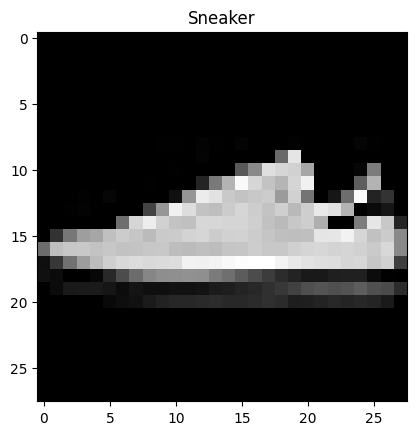

In [ ]:
# -- Load ----------------------------------------------------------------------
image_name=data.iloc[6, 1]
image_path=os.path.join(directory,image_name)

image=Image.open(image_path)

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data.iloc[6, 0])
plt.show()

<h2 id="Dataset">DataSet Class</h3>

In [ ]:
# Own DataSet

"""
Args:
  csv_file (csv)     : File with the names of the images
  data_dir (string)  : Directory path.
  transform (object) : Transform function applyied to the images
"""
class Image_Dataset(Dataset):

    def __init__(self, csv_file, data_dir, transform=None):

        # images directory
        self.data_dir=data_dir

        # load the CSV file. contains the labels of the images
        csv_path=os.path.join(self.data_dir,csv_file)
        self.df_names=pd.read_csv(csv_path)

        # number of images in dataset
        self.len=self.df_names.shape[0]

        # transform applyied to each image.
        self.transform=transform

    """Get length"""
    def __len__(self): return self.len

    """
    Get image.

    Args:
      idx (int) : Index.
    """
    def __getitem__(self, idx):

        # path
        img_name=os.path.join(self.data_dir,self.df_names.iloc[idx, 1])

        image=Image.open(img_name)
        if self.transform: image = self.transform(image)

        # label of the image
        label=self.df_names.iloc[idx, 0]



        return image, label

# create the dataset
data_set=Image_Dataset(csv_file=csv_file, data_dir=directory)

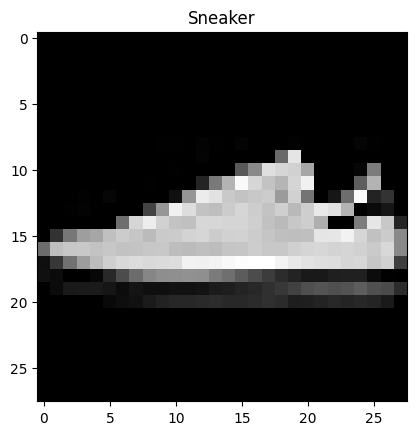

In [ ]:
image=data_set[6][0]
label=data_set[6][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(label)
plt.show()

<h2 id="Torchvision"> Torchvision Transforms  </h2>

(ORIGINAL) Size of an elemento:  (28, 28)
(TRANSFORMED) Size of an elemento: torch.Size([1, 10, 10])



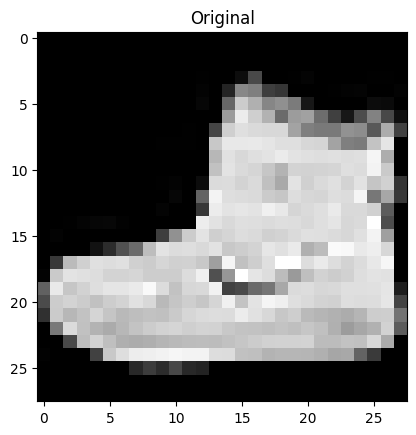

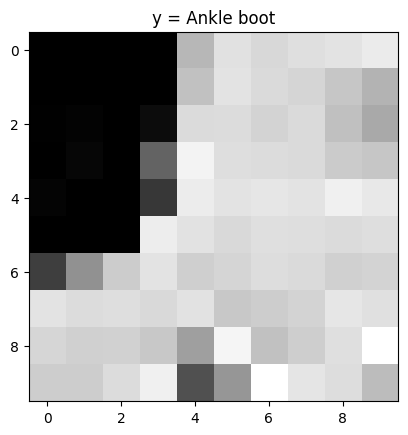

In [ ]:
data_set=Image_Dataset(csv_file=csv_file, data_dir=directory)
print("(ORIGINAL) Size of an elemento: ", data_set[0][0].size)

# Combine transforms.
# - crop
# - convert to tensor

transform=transforms.Compose([transforms.CenterCrop(10),
                              transforms.ToTensor()])

data_set_trans=Image_Dataset(csv_file=csv_file, data_dir=directory,
                       transform=transform)

print("(TRANSFORMED) Size of an elemento: {}\n".format(data_set_trans[0][0].shape))

plt.imshow(data_set[0][0],cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.show()
print()
show_data(data_set_trans[0],shape=(10, 10))

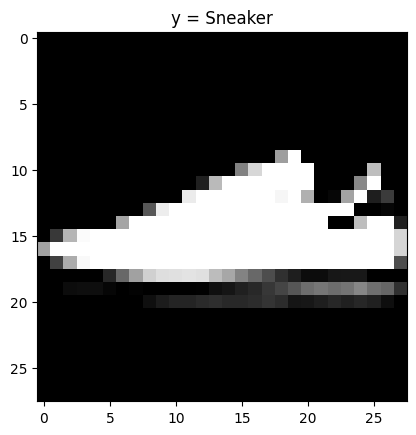

In [ ]:
# Horizontal flip
"""transform=transforms.Compose([
  transforms.RandomHorizontalFlip(p=1),
  transforms.ToTensor()
])"""
# 45º
"""transform=transforms.Compose([
    transforms.RandomRotation(degrees=45),
    transforms.ToTensor()
])"""

# color Jitter
"""transform=transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),
    transforms.ToTensor()
])"""
# blur
"""transform=transforms.Compose([
    transforms.GaussianBlur(kernel_size=15),
    transforms.ToTensor()
])"""
# invert colors
"""transform=transforms.Compose([
    transforms.RandomInvert(p=1),
    transforms.ToTensor()
])"""
# random perspectives
"""transform=transforms.Compose([
    transforms.RandomPerspective(distortion_scale=0.6, p=0.5),
    transforms.ToTensor()
])"""

# automatically learned augmentations.
transform=transforms.Compose([
    transforms.AutoAugment(),
    transforms.ToTensor()
])

dataset = Image_Dataset(csv_file=csv_file, data_dir=directory,
                        transform=transform)
show_data(dataset[6])